## Decay Chain 
Below is an example of how to reproduce a decay chain of a certain nuclide given its nucname or id and the amount of generations in the decay chain. Pyne.gui.decaychain will produce a visual representation of the decay chain.

In [2]:
from pyne import data
from pyne import nucname
from pyne.gui import decaychain
import numpy as np
import matplotlib.pyplot as plt

For this example, the decay chain of U-235 will be studied. To begin, a list named IDS has been created and the nucname.id of U-235 has been put in this list as the intial start point of this decay chain. 

In [3]:
# Decay chain
U235 = nucname.id('U-235')
decay_graph = decaychain.graph('922350000')
IDS = [922350000]
gens = 5 # the number of generations of the decay chain 
generation = [0] # intial list of the generation count
parent_to_child = [] #list of the parent nuclide to its daughter nuclide
parent_text = [] #list of the name of the nuclide in text form


A for loop will be used to interate through the decay chain of U-235 and store the names, ids, and relationships of the parent and  daughter nuclides.  

In [4]:
j = 0 #counter
for i in range(gens):
    iso = IDS[i]
    child = data.decay_data_children(iso)
    nums =len(child)
    if nums ==1:
        IDS.append(child[0])
        j+=1
        generation.append(j)
        parent_to_child.append(str(iso)+'-->'+str(child[0]))
        parent_text.append(str(nucname.name(IDS[i]))+'-->'+str(nucname.name(child[0])))
    if nums ==2:
        IDS.append(child[0])
        parent_to_child.append(str(iso)+'-->'+str(child[0]))
        parent_text.append(str(nucname.name(IDS[i]))+'-->'+str(nucname.name(child[0])))
        IDS.append(child[1])
        parent_to_child.append(str(iso)+'-->'+str(child[1]))
        parent_text.append(str(nucname.name(IDS[i]))+'-->'+str(nucname.name(child[1])))
        j+=1
        generation.append(j)
        generation.append(j)

To understand more about these nuclides, their halflives have been found and stored in the list half_lives by the for loop below.

In [5]:
half_lives = []
for i in IDS:
    half_life = data.half_life(str(i))
    half_lives.append(half_life)

[(922350000, 0, 2.22165504e+16, 'U235-->Th231'), (902310000, 1, 91872.0, 'Th231-->Pa231'), (912310000, 2, 1033826976000.0, 'Pa231-->Ac227'), (892270000, 3, 687072067.1999999, 'Ac227-->Fr223'), (872230000, 4, 1320.0, 'Ac227-->Th227'), (902270000, 4, 1615420.7999999998, 'Fr223-->At219'), (852190000, 5, 56.0, 'Fr223-->Ra223')]


The data of these nuclides in the decay chain have been zipped together by nuclide_data. nuclide_data contains the id number, generation, half life, and parent to daughter decay.

In [12]:
nuclide_data = zip(IDS,generation,half_lives,parent_text)
print(*list(nuclide_data))

(922350000, 0, 2.22165504e+16, 'U235-->Th231') (902310000, 1, 91872.0, 'Th231-->Pa231') (912310000, 2, 1033826976000.0, 'Pa231-->Ac227') (892270000, 3, 687072067.1999999, 'Ac227-->Fr223') (872230000, 4, 1320.0, 'Ac227-->Th227') (902270000, 4, 1615420.7999999998, 'Fr223-->At219') (852190000, 5, 56.0, 'Fr223-->Ra223')


The parent to daughter lists, generation list, and list of nuclide ids has been printed below.

In [19]:
print('Parent to child relationships:' + str(parent_text))
print(parent_to_child)
print('generations:' + str(generation))
print('list of nucname.ids:'+str(IDS))

Parent to child relationships:['U235-->Th231', 'Th231-->Pa231', 'Pa231-->Ac227', 'Ac227-->Fr223', 'Ac227-->Th227', 'Fr223-->At219', 'Fr223-->Ra223']
['922350000-->902310000', '902310000-->912310000', '912310000-->892270000', '892270000-->872230000', '892270000-->902270000', '872230000-->852190000', '872230000-->882230000']
generations:[0, 1, 2, 3, 4, 4, 5, 5]
list of nucname.ids:[922350000, 902310000, 912310000, 892270000, 872230000, 902270000, 852190000, 882230000]


The decaychain graph of U-235 via pyne.gui.decaychain has been graphed below to show the entirety of the decay chain of U-235.

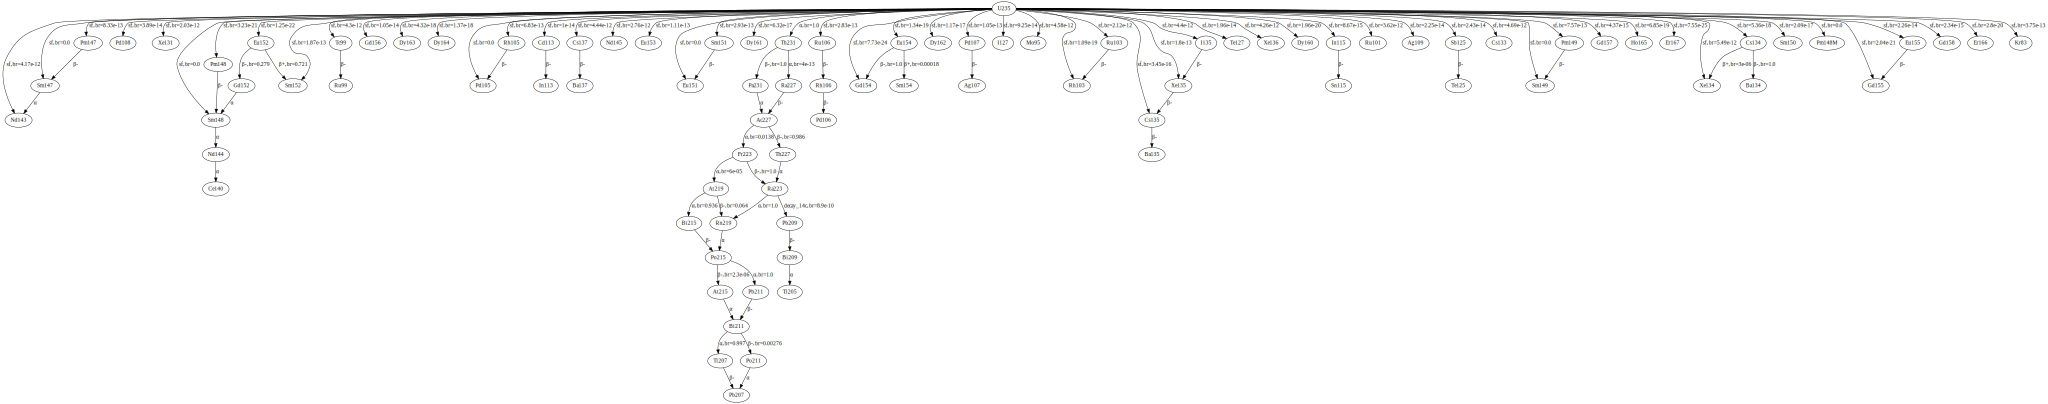

In [20]:
decaychain.graph('922350000')